In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def table_verizon(file):
    data = pd.read_table(file, header=None, names=["1"], escapechar="$")
    data = data[335:351]
    data = data["1"].str.split(',,', expand=True)  # initial split
    data.columns = ["0", "1", "2", "3", "4", "5", "6"]
    data["0"] = data["0"].map(lambda x: x.lstrip(','))
    # Adjusting date row - possible to loop this?
    data["1"][335] = data["2"][335]
    data["2"][335] = data["3"][335]
    data["3"][335] = data["4"][335]
    data["4"][335] = data["5"][335]
    data["5"][335] = data["6"][335]
    data.drop(['6'], axis=1, inplace=True)
    # Dropping None values
    data = data.replace([None], [''], regex=True)
    # Dealing with rows with $
    data.iloc[3].str.split(r'"$"', expand=True)
    # Stripping rest of the data - this should be looped?
    data["1"] = data["1"].map(lambda x: x.lstrip(',"').rstrip(r'"').replace(",",""))
    data["2"] = data["2"].map(lambda x: x.lstrip(',"').rstrip(r'"').replace(",",""))
    data["3"] = data["3"].map(lambda x: x.lstrip(',"').rstrip(r'"').replace(",",""))
    data["4"] = data["4"].map(lambda x: x.lstrip(',"').rstrip(r'"').replace(",",""))
    data["5"] = data["5"].map(lambda x: x.lstrip(',"').rstrip(r'"').replace(",",""))
    new_header = data.iloc[0]  # grab the first row for the header
    data = data[1:]  # take the data less the header row
    data.columns = new_header
    # Converting to number
    years = ["2017", "2016", "2015", "2014", "2013"]
    data[years] = data[years].apply(pd.to_numeric, axis=1)

    # Calculate CAGR
    data["CAGR (%)"] = ((data["2017"] / data["2013"]) ** (1/len(years)) - 1)

  #  data.to_csv("example_output.csv")

   

#    data.plot.bar()
 #   plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], data.iloc[:,0])
    
    return data.style.format({'2017': "{:,.1f}", '2016': "{:,.1f}", '2015': "{:,.1f}",'2014': "{:,.1f}", '2013': "{:,.1f}", 'CAGR (%)': '{:.1%}'})


In [50]:
table_verizon("example.csv")

335,,2017,2016,2015,2014,2013,CAGR (%)
336,Results of Operations,nan,nan,nan,nan,nan,nan%
337,Operating revenues,"126,034.0","125,980.0","131,620.0","127,079.0","120,550.0",0.9%
338,Operating income,"27,414.0","27,059.0","33,060.0","19,599.0","31,968.0",-3.0%
339,Net income attributable to Verizon,"30,101.0","13,127.0","17,879.0","9,625.0","11,497.0",21.2%
340,Per common share – basic,7.4,3.2,4.4,2.4,4.0,12.9%
341,Per common share – diluted,7.4,3.2,4.4,2.4,4.0,13.0%
342,Cash dividends declared per common share,2.3,2.3,2.2,2.2,2.1,2.2%
343,Net income attributable to noncontrolling interests,449.0,481.0,496.0,"2,331.0","12,050.0",-48.2%
344,Financial Position,nan,nan,nan,nan,nan,nan%
345,Total assets,"257,143.0","244,180.0","244,175.0","232,109.0","273,184.0",-1.2%


In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def visual_verizon(file):
    data = pd.read_table(file, header=None, names=["1"], escapechar="$")
    data = data[335:351]
    data = data["1"].str.split(',,', expand=True)  # initial split
    data.columns = ["0", "1", "2", "3", "4", "5", "6"]
    data["0"] = data["0"].map(lambda x: x.lstrip(','))
    # Adjusting date row - possible to loop this?
    data["1"][335] = data["2"][335]
    data["2"][335] = data["3"][335]
    data["3"][335] = data["4"][335]
    data["4"][335] = data["5"][335]
    data["5"][335] = data["6"][335]
    data.drop(['6'], axis=1, inplace=True)
    # Dropping None values
    data = data.replace([None], [''], regex=True)
    # Dealing with rows with $
    data.iloc[3].str.split(r'"$"', expand=True)
    # Stripping rest of the data - this should be looped?
    data["1"] = data["1"].map(lambda x: x.lstrip(',"').rstrip(r'"').replace(",",""))
    data["2"] = data["2"].map(lambda x: x.lstrip(',"').rstrip(r'"').replace(",",""))
    data["3"] = data["3"].map(lambda x: x.lstrip(',"').rstrip(r'"').replace(",",""))
    data["4"] = data["4"].map(lambda x: x.lstrip(',"').rstrip(r'"').replace(",",""))
    data["5"] = data["5"].map(lambda x: x.lstrip(',"').rstrip(r'"').replace(",",""))
    new_header = data.iloc[0]  # grab the first row for the header
    data = data[1:]  # take the data less the header row
    data.columns = new_header
    # Converting to number
    years = ["2017", "2016", "2015", "2014", "2013"]
    data[years] = data[years].apply(pd.to_numeric, axis=1)

    # Calculate CAGR
    data["CAGR (%)"] = ((data["2017"] / data["2013"]) ** (1/len(years)) - 1)

  #  data.to_csv("example_output.csv")

   


 #   plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], data.iloc[:,0])

    visuals = data.iloc[1:3, :]
    visuals.index=visuals.iloc[:, 0]
    visuals = visuals.iloc[:, 1:6]
    visuals.columns=["2017", "2016", "2015", "2014", "2013"]
    visuals = visuals.T
    ax = visuals.plot.scatter(x="Operating income", y="Operating revenues")
    plt.style.use('ggplot')
    plt.title("Verizon Financials (2013-2017)")
  #  for i, txt in enumerate(visuals.index):
      #  ax.annotate(txt, (visuals.x.iat[i],visuals.y.iat[i]))
    
    return plt.show()

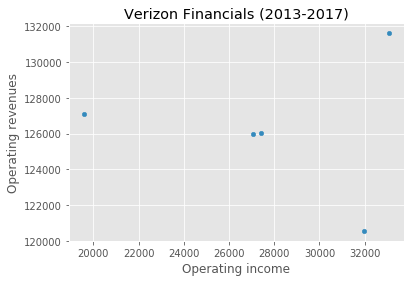

In [161]:
visual_verizon("example.csv")